In [ ]:
pip install turicreate

In [ ]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [ ]:
def plot_model(data,model,feature):
  plt.plot(data[feature],data['price'],'.',
         data[feature], model.predict(data),'-')

In [ ]:
sales = tc.SFrame('/content/drive/My Drive/home_data.sframe')
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [ ]:
sales = sales.sort(['sqft_living','price'])

In [ ]:
poly_data = polynomial_sframe(sales['sqft_living'],15)
my_features = poly_data.column_names()
poly_data['price'] = sales['price']
model_1 = tc.linear_regression.create(poly_data,target='price',features=my_features,validation_set=None,l2_penalty=1e-5)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.049564     | 2662555.740143     | 245656.462167                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model_1.coefficients

name,index,value,stderr
(intercept),None,167924.8411365645,417119.3944525994
power_1,None,103.09100281549647,1916.06423563516
power_2,None,0.13460449094841306,3.6652773754361316
power_3,None,-0.00012907132993368513,0.003853571751820978
power_4,None,5.189288591857424e-08,2.4779726756611413e-06
power_5,None,-7.77169179606626e-12,1.0241563597247733e-09
power_6,None,1.7114485533390073e-16,2.776469904058111e-13
power_7,None,4.511778034333865e-20,5.0002747716762833e-17
power_8,None,-4.788393972713383e-25,6.592184360020936e-21
power_9,None,-2.3334339873835155e-28,8.424206775684057e-25


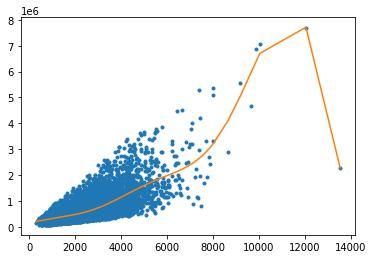

In [ ]:
plot_model(ploy_data,model_1,'power_1')

In [ ]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

First I fit the data using l2 penalty has 1e-5 on 15 order polynomial on 4 differet data set as u can see the code down below

In [ ]:
poly15_data_set_1 = polynomial_sframe(set_1['sqft_living'],15)
my_features_set_1 = poly15_data_set_1.column_names()
poly15_data_set_1['price'] = set_1['price']
model_set_1 = tc.linear_regression.create(poly15_data_set_1,target='price',features=my_features_set_1,validation_set=None,l2_penalty=1e-5,verbose=False)

In [ ]:
poly15_data_set_2 = polynomial_sframe(set_2['sqft_living'],15)
my_features_set_2 = poly15_data_set_2.column_names()
poly15_data_set_2['price'] = set_2['price']
model_set_2 = tc.linear_regression.create(poly15_data_set_2,target='price',features=my_features_set_2,validation_set=None,l2_penalty=1e-5,verbose=False)

In [ ]:
poly15_data_set_3 = polynomial_sframe(set_3['sqft_living'],15)
my_features_set_3 = poly15_data_set_3.column_names()
poly15_data_set_3['price'] = set_3['price']
model_set_3 = tc.linear_regression.create(poly15_data_set_3,target='price',features=my_features_set_3,validation_set=None,l2_penalty=1e-5,verbose=False)

In [ ]:
poly15_data_set_4 = polynomial_sframe(set_4['sqft_living'],15)
my_features_set_4 = poly15_data_set_4.column_names()
poly15_data_set_4['price'] = set_4['price']
model_set_4 = tc.linear_regression.create(poly15_data_set_4,target='price',features=my_features_set_4,validation_set=None,l2_penalty=1e-5,verbose=False)

In [ ]:
model_set_1.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    9306.471666783094    |   835731.1017251629    |
|   power_1   |  None |    585.8657909049208    |   3606.1918080597516   |
|   power_2   |  None |   -0.3973058601629169   |   6.439476529039794    |
|   power_3   |  None |  0.00014147088211673836 |  0.006292902548486085  |
|   power_4   |  None | -1.5294594218366155e-08 | 3.7622672052151353e-06 |
|   power_5   |  None | -3.7975684190822394e-13 | 1.4665679438777962e-09 |
|   power_6   |  None |  5.974816771652302e-17  | 3.9453132513026287e-13 |
|   power_7   |  None |  1.0688855991571289e-20 | 7.846677592518058e-17  |
|   power_8   |  None |  1.593438206740365e-25  | 1.1905534191043944e-20 |
|   power_9   |  None |  -6.928349971079106e-29 | 1.2334316110359946e-24 |
|   power_10  |  None |  

In [ ]:
model_set_2.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |   -25115.900151435286   |   1249261.9191205308   |
|   power_1   |  None |    783.4937840940456    |    6449.52011534965    |
|   power_2   |  None |   -0.7677592799765965   |   13.683056402135607   |
|   power_3   |  None |  0.0004387663539667347  |  0.015465580032720918  |
|   power_4   |  None | -1.1516916252654342e-07 | 9.786302274237439e-06  |
|   power_5   |  None |  6.842813873220176e-12  | 2.4014390626980227e-09 |
|   power_6   |  None |  2.5119513352344943e-15 |          nan           |
|   power_7   |  None | -2.0644045819685336e-19 |          nan           |
|   power_8   |  None |  -4.596731895260978e-23 |          nan           |
|   power_9   |  None | -2.7127898185302984e-29 | 1.7427432662025357e-24 |
|   power_10  |  None |  

In [ ]:
model_set_3.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    462426.5591391596    |   1150080.3314340606   |
|   power_1   |  None |    -759.2518251789179   |   5272.823277645916    |
|   power_2   |  None |    1.028670031748481    |    9.80772244214362    |
|   power_3   |  None |  -0.0005282645234067217 |  0.009371398741557095  |
|   power_4   |  None |  1.1542290986269853e-07 | 4.116416465073988e-06  |
|   power_5   |  None |  -2.260960514447858e-12 |          nan           |
|   power_6   |  None | -2.0821427030058045e-15 |          nan           |
|   power_7   |  None |  4.087705464351559e-20  |          nan           |
|   power_8   |  None |  2.570790880439038e-23  |          nan           |
|   power_9   |  None |  1.2431129062460168e-27 |          nan           |
|   power_10  |  None | -

In [ ]:
model_set_4.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |   -170240.03874811344   |   1524801.0710501412   |
|   power_1   |  None |    1247.5903748815276   |    9803.93328376963    |
|   power_2   |  None |   -1.2246091763761762   |   26.131520143298776   |
|   power_3   |  None |  0.0005552546763070816  |  0.03824000393337173   |
|   power_4   |  None |  -6.382626229752453e-08 | 3.424753965959833e-05  |
|   power_5   |  None | -2.2021592150225444e-11 | 1.964547904058074e-08  |
|   power_6   |  None |  4.818345841014213e-15  | 7.2010970386197905e-12 |
|   power_7   |  None |  4.2146172768278807e-19 | 1.5150970564834001e-15 |
|   power_8   |  None |  -7.998808427775244e-23 |          nan           |
|   power_9   |  None |  -1.323659051046672e-26 |          nan           |
|   power_10  |  None |  

Then I fit the data using l2 penalty has 1e5 on 15 order polynomial on 4 differet dataset as u can see the code down below

In [ ]:
poly15_diff_data_set_1 = polynomial_sframe(set_1['sqft_living'],15)
my_features_diff_set_1 = poly15_diff_data_set_1.column_names()
poly15_diff_data_set_1['price'] = set_1['price']
model_diff_set_1 = tc.linear_regression.create(poly15_diff_data_set_1,target='price',features=my_features_diff_set_1,validation_set=None,l2_penalty=1e5,verbose=False)

In [ ]:
poly15_diff_data_set_2 = polynomial_sframe(set_2['sqft_living'],15)
my_features_diff_set_2 = poly15_diff_data_set_2.column_names()
poly15_diff_data_set_2['price'] = set_2['price']
model_diff_set_2 = tc.linear_regression.create(poly15_diff_data_set_2,target='price',features=my_features_diff_set_2,validation_set=None,l2_penalty=1e5,verbose=False)

In [ ]:
poly15_diff_data_set_3 = polynomial_sframe(set_3['sqft_living'],15)
my_features_diff_set_3 = poly15_diff_data_set_3.column_names()
poly15_diff_data_set_3['price'] = set_3['price']
model_diff_set_3 = tc.linear_regression.create(poly15_diff_data_set_3,target='price',features=my_features_diff_set_3,validation_set=None,l2_penalty=1e5,verbose=False)

In [ ]:
poly15_diff_data_set_4 = polynomial_sframe(set_4['sqft_living'],15)
my_features_diff_set_4 = poly15_diff_data_set_4.column_names()
poly15_diff_data_set_4['price'] = set_4['price']
model_diff_set_4 = tc.linear_regression.create(poly15_diff_data_set_4,target='price',features=my_features_diff_set_4,validation_set=None,l2_penalty=1e5,verbose=False)

In [ ]:
model_diff_set_1.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   530317.0245158835    |   1257672.9815664748   |
|   power_1   |  None |   2.5873887567286866   |   5426.877130671406    |
|   power_2   |  None | 0.0012741440059211389  |   9.690623729674423    |
|   power_3   |  None | 1.7493422693158888e-07 |  0.009470047835391536  |
|   power_4   |  None | 1.0602211909664255e-11 | 5.661751493590754e-06  |
|   power_5   |  None | 5.422476044821802e-16  | 2.207005189634751e-09  |
|   power_6   |  None | 2.895638283427736e-20  | 5.937213380879137e-13  |
|   power_7   |  None | 1.6500066635095533e-24 | 1.180828903316128e-16  |
|   power_8   |  None | 9.860815284092929e-29  | 1.7916371249416455e-20 |
|   power_9   |  None | 6.065893482543571e-33  | 1.856163553812698e-24  |
|   power_10  |  None |  3.78917868869

In [ ]:
model_diff_set_2.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   519216.89738342643   |   1721757.2123052469   |
|   power_1   |  None |   2.0447047418193702   |   8888.854774608435    |
|   power_2   |  None |  0.001131436268395815  |   18.858255971927584   |
|   power_3   |  None | 2.930742775489715e-07  |  0.021314964905491642  |
|   power_4   |  None | 4.435405984532599e-11  | 1.348767321293964e-05  |
|   power_5   |  None | 4.808491122043451e-15  | 3.3097102879936184e-09 |
|   power_6   |  None | 4.530917078263863e-19  |          nan           |
|   power_7   |  None | 4.160429105745837e-23  |          nan           |
|   power_8   |  None | 3.900946351283383e-27  |          nan           |
|   power_9   |  None | 3.7773187602026055e-31 | 2.401882857273838e-24  |
|   power_10  |  None | 3.766503268417

In [ ]:
model_diff_set_3.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   522911.5180475719    |   1603227.0435106703   |
|   power_1   |  None |   2.268904218765788    |   7350.384702113467    |
|   power_2   |  None | 0.0012590504184157218  |   13.672093526618752   |
|   power_3   |  None | 2.775529181545171e-07  |  0.01306385257389094   |
|   power_4   |  None | 3.209330977903899e-11  | 5.738338461044795e-06  |
|   power_5   |  None |  2.87573572364483e-15  |          nan           |
|   power_6   |  None | 2.5007611267119227e-19 |          nan           |
|   power_7   |  None | 2.2468526590627854e-23 |          nan           |
|   power_8   |  None | 2.0934998313470212e-27 |          nan           |
|   power_9   |  None | 2.0043538329631962e-31 |          nan           |
|   power_10  |  None | 1.954108002485

In [ ]:
model_diff_set_4.coefficients.print_rows(num_rows=16,num_columns=4)

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   513667.0870874073    |   2016363.5920417374   |
|   power_1   |  None |   1.9104093824432002   |   12964.506982267996   |
|   power_2   |  None | 0.0011005802917477246  |    34.5557507940131    |
|   power_3   |  None | 3.1275398787880605e-07 |  0.05056774496995881   |
|   power_4   |  None | 5.5006788682463865e-11 | 4.528819752143835e-05  |
|   power_5   |  None | 7.204675578247076e-15  | 2.5978751876377342e-08 |
|   power_6   |  None | 8.249772493837896e-19  | 9.522573250445366e-12  |
|   power_7   |  None | 9.065032234977412e-23  | 2.003531215385848e-15  |
|   power_8   |  None | 9.956831604526306e-27  |          nan           |
|   power_9   |  None | 1.1083812798160374e-30 |          nan           |
|   power_10  |  None | 1.253152241432

In [ ]:
pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation


In [ ]:
import turicreate_cross_validation.cross_validation as tcv

(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=1)

In [ ]:
train_valid_shuffled

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
8645511350,2014-12-01 00:00:00+00:00,300000.0,3.0,1.75,1810.0,21138.0,1.0,0
7237501370,2014-07-17 00:00:00+00:00,1079000.0,4.0,3.25,4800.0,12727.0,2.0,0
7278700100,2015-01-21 00:00:00+00:00,625000.0,4.0,2.5,2740.0,9599.0,1.0,0
1421079007,2015-03-24 00:00:00+00:00,408506.0,3.0,2.75,2480.0,209199.0,1.5,0
4338800370,2014-11-17 00:00:00+00:00,220000.0,3.0,1.0,1000.0,6020.0,1.0,0
7511200020,2014-08-29 00:00:00+00:00,509900.0,3.0,1.75,1690.0,53578.0,1.0,0
3300701615,2014-09-30 00:00:00+00:00,655000.0,4.0,2.5,2630.0,4000.0,3.0,0
7011200260,2014-12-19 00:00:00+00:00,485000.0,4.0,2.0,1400.0,3600.0,1.0,0
3570000130,2014-06-11 00:00:00+00:00,580379.0,4.0,2.75,2240.0,27820.0,1.5,0
2796100640,2015-04-24 00:00:00+00:00,264900.0,4.0,2.5,2040.0,7000.0,1.0,0


In [ ]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print (i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [ ]:
validation4 = train_valid_shuffled[5818.8:7757.4]

In [ ]:
print (int(round(validation4['price'].mean(), 0)))

559642


In [ ]:
start,end = (5818.8, 7757.4)
n = len(train_valid_shuffled)
first= train_valid_shuffled[0:start-1]
last= train_valid_shuffled[end+1:n]
train4 = first.append(last)

In [ ]:
print (int(round(train4['price'].mean(), 0)))

536865


In [ ]:
def RSS(predictions,output):
  error = output - predictions
  ans = error*error
  Rss = ans.sum()
  return(Rss)

In [ ]:
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'],15)
features_list = poly15_data.column_names()
poly15_data['price'] = train_valid_shuffled['price']
poly15_data


power_1,power_2,power_3,power_4,power_5,power_6
1810.0,3276100.0,5929741000.0,10732831210000.0,1.94264244901e+16,3.5161828327081e+19
4800.0,23040000.0,110592000000.0,530841600000000.0,2.54803968e+18,1.2230590464e+22
2740.0,7507600.0,20570824000.0,56364057760000.0,1.544375182624e+17,4.23158800038976e+20
2480.0,6150400.0,15252992000.0,37827420160000.0,9.38120019968e+16,2.32653764952064e+20
1000.0,1000000.0,1000000000.0,1000000000000.0,1000000000000000.0,1e+18
1690.0,2856100.0,4826809000.0,8157307210000.0,1.37858491849e+16,2.3298085122481e+19
2630.0,6916900.0,18191447000.0,47843505610000.0,1.258284197543e+17,3.30928743953809e+20
1400.0,1960000.0,2744000000.0,3841600000000.0,5378240000000000.0,7.529536e+18
2240.0,5017600.0,11239424000.0,25176309760000.0,5.63949338624e+16,1.26324651851776e+20
2040.0,4161600.0,8489664000.0,17318914560000.0,3.53305857024e+16,7.2074394832896e+19


In [ ]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
  value = []
  for i in range(k-1):
    n = len(data)
    start = (n*i)/k
    end = (n*(i+1))/k-1
    validation_set = data[start:end]
    first = data[0:start]
    last = data[end+1:n]
    training_set = first.append(last)
    model= tc.linear_regression.create(training_set,target=output_name,features=features_list,validation_set=None,verbose=False,l2_penalty=l2_penalty)
    value.insert(i,RSS(model.predict(validation_set),validation_set['price']))
  ans = np.array(value)
  return ans.mean()
    



In [ ]:
k_fold_cross_validation(10,10,poly15_data,'price',features_list)

678743338499246.5

In [ ]:
penalty = np.logspace(1, 7, num=13)
penalty[4]

1000.0

In [ ]:
def min_cross_validation(penalty):
  min = 10000000000000000000000000000000
  pointer = 0
  n = len(penalty)
  for i in range(n):
    current = k_fold_cross_validation(10,penalty[i],poly15_data,'price',features_list)
    if current < min:
      min = current
      pointer = i
  print(min)
  print(pointer)
  
  
    


In [ ]:
min_cross_validation(penalty)

118846115370059.11
4


In [ ]:
poly15_train_data = polynomial_sframe(train_valid_shuffled['sqft_living'],15)
poly15_test_data = polynomial_sframe(test['sqft_living'],15)
poly15_test_data['price'] = test['price']
my_features_set = poly15_train_data.column_names()
poly15_train_data['price'] = train_valid_shuffled['price']
model_final = tc.linear_regression.create(poly15_train_data,target='price',features=my_features_set,validation_set=None,verbose=False,l2_penalty=1000)
predictions = model_final.predict(poly15_test_data)
print(RSS(model_final.predict(poly15_test_data),poly15_test_data['price']))

128780855058449.38
